<a href="https://colab.research.google.com/github/alonsosilvaallende/COVID-19/blob/master/COVID_19_deaths_do_nothing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('seaborn')

In [0]:
deaths = pd.read_csv("https://covid.ourworldindata.org/data/total_deaths.csv", index_col='date')

In [3]:
deaths[["France", "Italy", "Spain"]].tail(3)

,France,Italy,Spain
date,,,
2020-03-15,91.0,1441.0,136.0
2020-03-16,127.0,1809.0,288.0
2020-03-17,148.0,2503.0,309.0


In [0]:
list_countries = ["France", "Italy", "Spain"]

In [0]:
TIPPING_POINT = 10

In [0]:
France_lockdown = '2020-03-18'
Italy_lockdown = '2020-03-10'
Spain_lockdown = '2020-03-15'

In [0]:
deaths_country = {}
for country in list_countries:
  deaths_country[country] = deaths[country][deaths[country]> TIPPING_POINT]

In [8]:
France_gap = (pd.to_datetime(France_lockdown) - pd.to_datetime(deaths_country["France"].keys()[0])).days
France_gap

9

In [9]:
Italy_gap = (pd.to_datetime(Italy_lockdown) - pd.to_datetime(deaths_country["Italy"].keys()[0])).days
Italy_gap

13

In [10]:
Spain_gap = (pd.to_datetime(Spain_lockdown) - pd.to_datetime(deaths_country["Spain"].keys()[0])).days
Spain_gap

5

In [0]:
x_trn_FR = np.arange(France_gap)
x_trn_ES = np.arange(Spain_gap)
x_trn_IT = np.arange(Italy_gap)

In [0]:
y_trn_FR = np.log(np.array(deaths_country["France"].iloc[:France_gap]))
y_trn_ES = np.log(np.array(deaths_country["Spain"].iloc[:Spain_gap]))
y_trn_IT = np.log(np.array(deaths_country["Italy"].iloc[:Italy_gap]))

In [0]:
x_trn_FR = x_trn_FR[...,None]
x_trn_ES = x_trn_ES[...,None]
x_trn_IT = x_trn_IT[...,None]

In [0]:
x = np.arange(len(deaths_country["Italy"]))
x = x[...,None]

In [0]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(x_trn_FR, y_trn_FR)
preds_FR = np.exp(lm.predict(x))

In [0]:
lm.fit(x_trn_ES, y_trn_ES)
preds_ES = np.exp(lm.predict(x))

In [0]:
lm.fit(x_trn_IT, y_trn_IT)
preds_IT = np.exp(lm.predict(x))

In logarithmic scale:

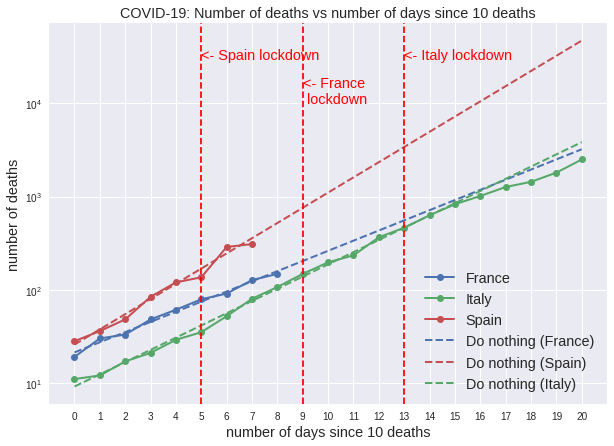

In [29]:
fig, ax = plt.subplots(figsize=(10,7))
for country in list_countries:
  plt.plot(np.arange(len(deaths_country[country])),deaths_country[country], label=country, linewidth=2, marker='o')
plt.plot(x, preds_FR, label="Do nothing (France)", linewidth=2, color='C0', linestyle='dashed')
plt.plot(x, preds_ES, label="Do nothing (Spain)", linewidth=2, color='C2', linestyle='dashed')
plt.plot(x, preds_IT, label="Do nothing (Italy)", linewidth=2, color='C1', linestyle='dashed')
plt.axvline(Spain_gap, color='red', linestyle='dashed')
plt.axvline(Italy_gap, color='red', linestyle='dashed')
plt.axvline(France_gap, color='red', linestyle='dashed')
plt.annotate('<- Spain lockdown', (Spain_gap, 30000.0), color='red', fontsize='x-large')
plt.annotate('<- Italy lockdown', (Italy_gap, 30000.0), color='red', fontsize='x-large')
plt.annotate('<- France\n lockdown', (France_gap, 10000.0), color='red', fontsize='x-large')
ax.set_title(f'COVID-19: Number of deaths vs number of days since {TIPPING_POINT} deaths', fontsize='x-large')
ax.set_xlabel(f'number of days since {TIPPING_POINT} deaths', fontsize='x-large')
ax.set_ylabel(f'number of deaths', fontsize='x-large')
ax.set_xticks(np.arange(len(deaths_country["Italy"])))
plt.yscale("log")
plt.legend(fontsize='x-large')
plt.show()

In [0]:
from google.colab import files
files.download("2020-03-20-COVID-19-Do-Nothing.png")

In [0]:
preds_next_FR = preds_FR[len(deaths_country["France"]):]
preds_next_ES = preds_ES[len(deaths_country["Spain"]):]
preds_next_IT = preds_IT[len(deaths_country["Italy"]):]

In [20]:
for prediction in preds_next_FR:
  print(int(prediction))

203
261
336
432
555
714
918
1180
1518
1951
2508
3224


In [21]:
for prediction in preds_next_ES:
  print(int(prediction))

521
758
1104
1608
2342
3410
4966
7232
10530
15334
22329
32514
47345
